## Сегментация банковских клиентов

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

warnings.filterwarnings("ignore")

* CCAvg:Средние расходы по кредитной карте

In [3]:
bank = pd.read_csv("../../data/bank.txt")
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
scaler = StandardScaler()

bank[['Income_scaled', 'CCAvg_scaled']] = scaler.fit_transform(bank[['Income', 'CCAvg']])
bank[['Income_scaled', 'CCAvg_scaled']].describe()

,Income_scaled,CCAvg_scaled
count,5.000000e+03,5.000000e+03
mean,1.449507e-16,-6.394885e-17
std,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00
25%,-7.554825e-01,-7.084116e-01
50%,-2.123482e-01,-2.506106e-01
75%,5.263146e-01,3.216407e-01
max,3.263712e+00,4.613525e+00


In [9]:
model = KMeans(n_clusters=3, random_state=42)

cluster_cols = ['Income_scaled', 'CCAvg_scaled']
model.fit(bank[cluster_cols])

bank['Cluster'] = model.predict(bank[cluster_cols])

Визуализация кластеров клиентов банка

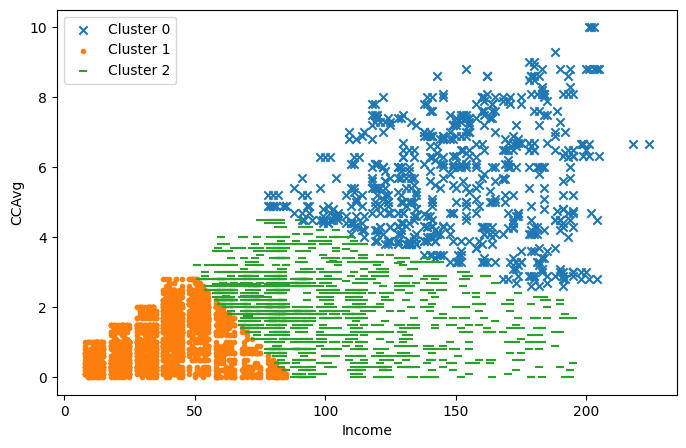

In [11]:
markers = ['x', '.', '_']

plt.figure(figsize=[8,5])
for clust in range(3):
    temp = bank[bank.Cluster == clust]
    plt.scatter(temp.Income, temp.CCAvg, 
                marker=markers[clust], 
                label="Cluster "+str(clust) )

plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.legend()
plt.show()

Сводная статистика по сегментам

In [12]:
bank.groupby('Cluster')[['Income', 'CCAvg']].mean()

,Income,CCAvg
Cluster,,
0,150.390282,5.540345
1,39.135072,0.982417
2,96.142777,2.025165


* 0 - большие доходы, но расходы больше
* 1 - доходы превышают расходы
* 2 - доходы значительно превышают расходы, плата по кредитке минимальна

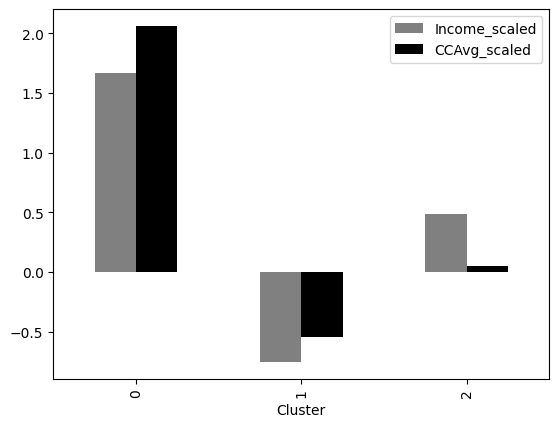

In [14]:
bank.groupby('Cluster')[['Income_scaled', 'CCAvg_scaled']]\
                        .mean().plot\
                        .bar(color=['gray','black'])
plt.show()

Средние значения для каждого кластера

In [16]:
sel_cols = ['Income', 'CCAvg', 'Age', 'Mortgage', 'Family', \
            'CreditCard', 'Online', 'Personal Loan']
bank.groupby('Cluster')[sel_cols].mean()

,Income,CCAvg,Age,Mortgage,Family,CreditCard,Online,Personal Loan
Cluster,,,,,,,,
0,150.390282,5.540345,43.924765,89.537618,2.017241,0.285266,0.605016,0.413793
1,39.135072,0.982417,45.797197,42.231218,2.513429,0.294667,0.592448,0.000000
2,96.142777,2.025165,45.184049,65.185165,2.363636,0.296152,0.600112,0.120468


### Многомерные данные

In [17]:
bank_scaled = bank.copy()
cluster_cols = ['Income', 'CCAvg', 'Age', 'Experience', 'Mortgage']
bank_scaled[cluster_cols] = scaler.fit_transform(bank_scaled[cluster_cols])

Кластеризация k-средних

In [19]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(bank_scaled[cluster_cols])

bank_scaled['Cluster'] = model.predict(bank_scaled[cluster_cols])

In [20]:
from sklearn import decomposition

Уменьшение размерности

In [21]:
pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(bank_scaled[cluster_cols])

bank_scaled['pc1'] = pca_res[:,0]
bank_scaled['pc2'] = pca_res[:,1]

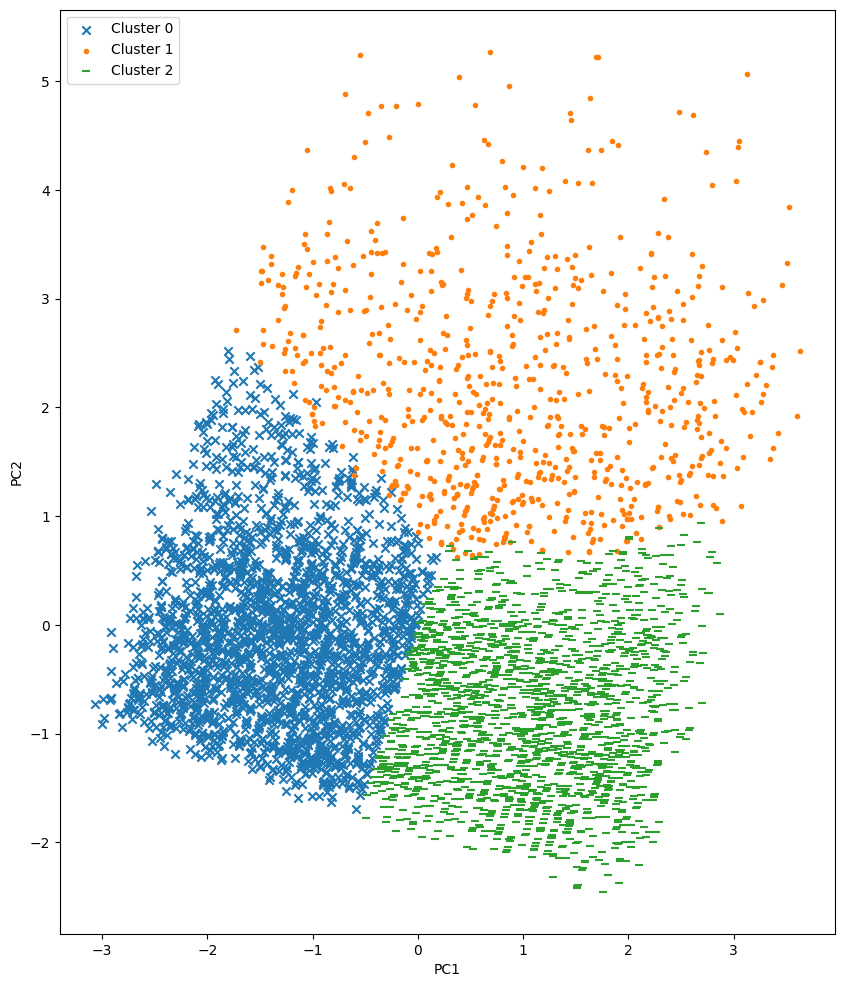

In [24]:
markers = ['x', '.', '_']
plt.figure(figsize=[10,12])

for clust in range(3):
    temp = bank_scaled[bank_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust],
                label="Cluster "+str(clust))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [25]:
bank['Cluster'] = bank_scaled.Cluster
bank.groupby('Cluster')[cluster_cols].mean()

,Income,CCAvg,Age,Experience,Mortgage
Cluster,,,,,
0,58.941774,1.367514,55.536044,30.233826,45.134935
1,147.650185,4.856403,43.672435,18.644005,116.279357
2,60.124322,1.382121,35.116428,9.873705,44.771584


In [30]:
sel_cols = ['Income', 'CCAvg', 'Age', 'Experience', 'Mortgage', 'Family', 'CreditCard', 'Online', 'Personal Loan']
bank.groupby('Cluster')[sel_cols].mean()

,Income,CCAvg,Age,Experience,Mortgage,Family,CreditCard,Online,Personal Loan
Cluster,,,,,,,,,
0,58.941774,1.367514,55.536044,30.233826,45.134935,2.397874,0.300370,0.604898,0.039741
1,147.650185,4.856403,43.672435,18.644005,116.279357,2.002472,0.299135,0.613103,0.398022
2,60.124322,1.382121,35.116428,9.873705,44.771584,2.552047,0.285150,0.581648,0.035520
